#匯入 tensorflow

In [81]:
import tensorflow as tf

#匯入mnist的影像

In [82]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

讀取mnist的資料，並且將圖像轉成虛擬變數的形式(由於本案例為灰階字體)，白色則為0，黑色則為1

In [83]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


觀察train, validation, test 共有多少筆資料，從結果來看，train 有55000筆、validation 有5000筆及test 10000筆資料

In [84]:
print('train', mnist.train.num_examples,
     ',validation', mnist.validation.num_examples,
     ',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


觀察訓練樣本的圖像，".shape"為觀察影像的pixel數；".label"為觀察影像總共有十種資料(ex. 0, 1, 2, 3, 4, 5, 6, 7, 8, 9)。

In [85]:
print('train images : ',mnist.train.images.shape,
     'lables : ',mnist.train.labels.shape)

train images :  (55000, 784) lables :  (55000, 10)


舉例來說，目前先看隨便抽取一張圖片來看，在array中，第8個位置出現是1，其代表為此張影像的數值為8

In [86]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

之後觀察此張圖中，有多少像素數量，由len 可得知此為784格

In [87]:
len(mnist.train.images[0])

784

觀察每一個像素的數值，從array中可發現其數值已經介於0~1之間。
以色素來看，原本數值應該介於0~255之間，為了讓模型更容易訓練，在此利用 灰階值/255進行設置(歸1化)

In [88]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

為了觀察影像，是否與array判斷一致，在此先匯入matplotlib.plot
並且定義一個函數plot_image(image)，內容如下:

1. 先把影像重新構成二維資料，由於本影象的像素總數為784，在本案例中，利用28乘28方式進行轉換，在此影像為正方形，也可轉成長方形，其概念為面積只要等於784即可
2. 本影像的顏色為灰階，故在cmap上則使用binary

In [89]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

圖形展現，觀察image 0 的狀況，此數值為7

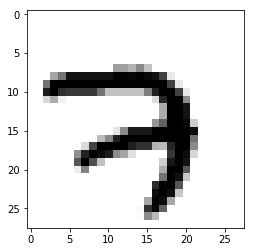

In [90]:
plot_image(mnist.train.images[0])

利用".labels"觀察array，是否在第7行出現1

In [91]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

探討array之變項，在此利用argmax進行觀察，從結果可明確看出此array為7

In [92]:
import numpy as np
np.argmax(mnist.train.labels[0])

7

當了解影像特徵後，在此定義一個新的function以預測"測試檔"的圖片，在size部分，則是設定圖片大小，在本案例中，設定為15乘15的大小
為了保持程式碼的穩定性，資料出現量的上限值為25張，且每一欄為5張進行呈現，表頭則以label的數值進行呈現

由於此案例只要找出1的位置，並不用知道0的位置，故在這建立一個if的函式，探討影像的圖中的數值為何


In [93]:
import matplotlib.pyplot as plt

def plot_image_labels_prediction(images, labels, prediction, idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(15,15)
    if num>25:num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)), cmap='binary')
        title = "label=" + str(np.argmax(labels[idx]))
        if len(prediction)>0:  
            title+=",prediction= "+str(prediction[idx])  
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

利用plot秀出影像資料

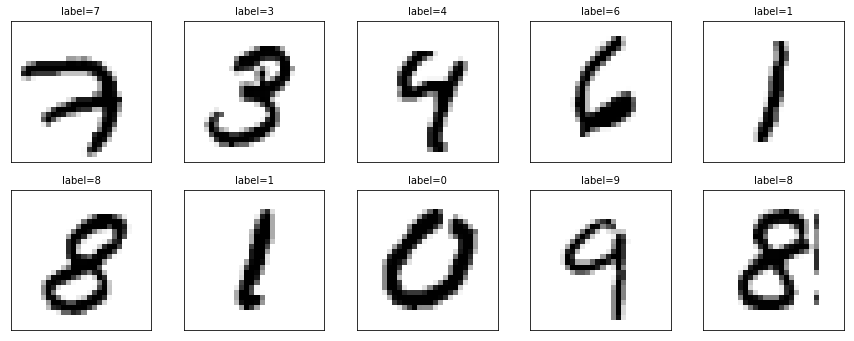

In [94]:
plot_image_labels_prediction(mnist.train.images,mnist.train.labels,[],0)

觀察validation的像素值與label

In [95]:
print('validation images : ',mnist.validation.images.shape,
     'lables : ',mnist.validation.labels.shape)

validation images :  (5000, 784) lables :  (5000, 10)


用plot展示validation的結果

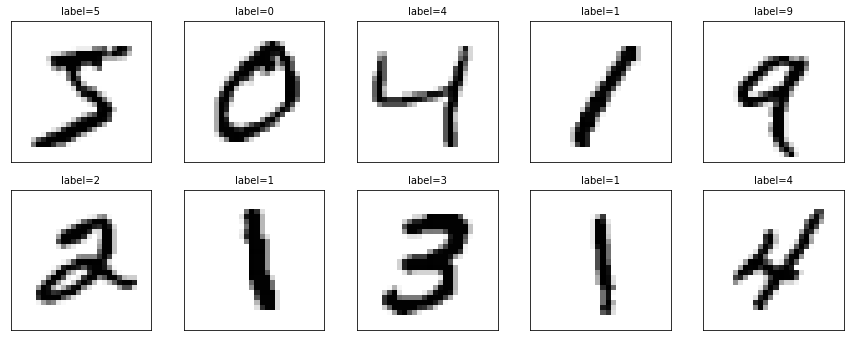

In [96]:
plot_image_labels_prediction(mnist.validation.images,mnist.validation.labels,[],0)

觀察test 的影像像素數量與label數，並且顯示

In [97]:
print('test images : ',mnist.test.images.shape,
     'lables : ',mnist.test.labels.shape)

test images :  (10000, 784) lables :  (10000, 10)


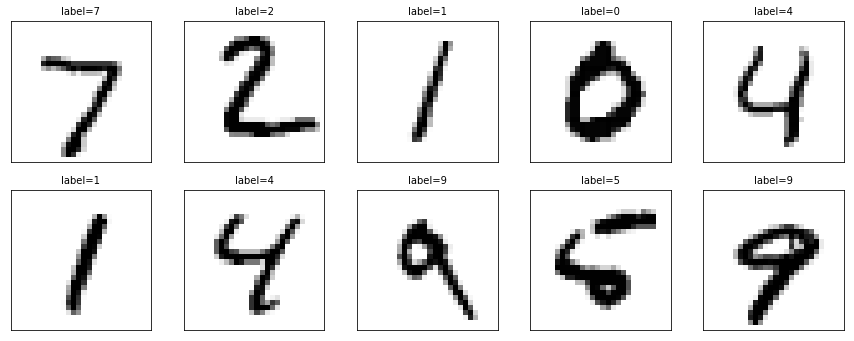

In [98]:
plot_image_labels_prediction(mnist.test.images,mnist.test.labels,[],0)

列批次訓練，一批為100個

In [99]:
batch_images_xs,batch_labels_ys = mnist.train.next_batch(batch_size=100)

In [100]:
print(len(batch_images_xs),
     len(batch_labels_ys))

100 100


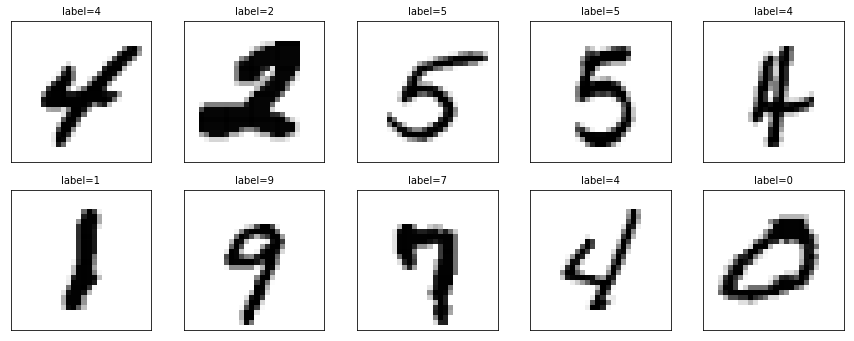

In [101]:
plot_image_labels_prediction(batch_images_xs,batch_labels_ys,[],0)

定義一個函式(layer)

從多層感知器單一個node來看，其函式應為y=ax+b，由於不知a,b 之關係，在此先以常態分佈的概念進行數值假設，在Activation(激勵函數)部分，預設為none。

In [102]:
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs, W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

將每一個input結果進行暫存

In [103]:
x = tf.placeholder("float",[None,784])

資料開始投入，h1的node設為1000，而input則是原本的x_784，在transfer function 設定為relu

h2則是接收h1的資料，在本案例中也是設定為1000

In [104]:
h1 = layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)

In [105]:
h2 = layer(output_dim=1000,input_dim=1000,inputs=h1,activation=tf.nn.relu)

在預測層，在本案例中先設定為10個node，input則為h2，transfer function 為none

In [106]:
y_predict = layer(output_dim=10,input_dim=1000,inputs=h2,activation=None)

In [107]:
y_label = tf.placeholder("float",[None,10])

設定誤差函數

In [108]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                    (logits=y_predict, labels=y_label))

為了讓誤差最小，在此利用線性代數進行將誤差最小化，學習率設定為0.001，代表每一次訓練的程度

In [109]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

修正預測

In [110]:
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

觀察準確率

In [111]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

設定訓練的次數、批次、總批次數、訓練時間，在本案例中Epochs跑15次，一次跑100個

In [112]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
loss_list=[];epoch_list=[];accuracy_list=[]
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

開始跑MLP

In [113]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,
                                                           y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:",'%02d' %(epoch+1),"Loss=",
            "{:.9f}".format(loss),"Accuracy=",acc)
    
duration = time()-startTime
print("Train Finished takes:",duration)

Train Epoch: 01 Loss= 141.653244019 Accuracy= 0.9116
Train Epoch: 02 Loss= 92.365058899 Accuracy= 0.9376
Train Epoch: 03 Loss= 68.013122559 Accuracy= 0.9494
Train Epoch: 04 Loss= 62.760799408 Accuracy= 0.954
Train Epoch: 05 Loss= 62.072338104 Accuracy= 0.9532
Train Epoch: 06 Loss= 61.673736572 Accuracy= 0.9538
Train Epoch: 07 Loss= 55.422199249 Accuracy= 0.9614
Train Epoch: 08 Loss= 54.302181244 Accuracy= 0.9592
Train Epoch: 09 Loss= 60.709880829 Accuracy= 0.9602
Train Epoch: 10 Loss= 51.134319305 Accuracy= 0.9664
Train Epoch: 11 Loss= 53.399810791 Accuracy= 0.965
Train Epoch: 12 Loss= 56.728107452 Accuracy= 0.9622
Train Epoch: 13 Loss= 64.057891846 Accuracy= 0.9626
Train Epoch: 14 Loss= 54.723442078 Accuracy= 0.9652
Train Epoch: 15 Loss= 54.292324066 Accuracy= 0.9704
Train Finished takes: 20.1766676902771


觀察跑出來的誤差及準確度

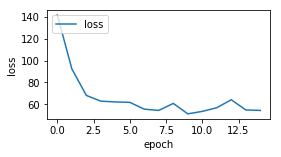

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

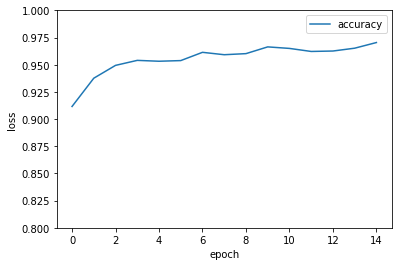

In [115]:
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.ylim(0.8,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [116]:
print("val Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))

val Accuracy: 0.9659


預測資料，並展示十筆資料

In [117]:
prediction_result = sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

In [118]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

觀察預測結果與實際值之狀況，從結果來看，這十個資料皆準確。

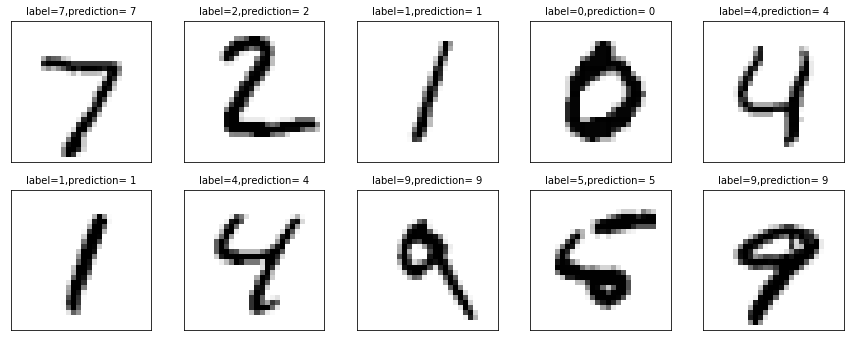

In [119]:
plot_image_labels_prediction(mnist.test.images,
                            mnist.test.labels,
                            prediction_result,0)